In [39]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [146]:
#load the data
df=pd.read_csv('Udemy Courses.csv')

In [147]:
#understand the data
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [148]:
df.shape

(3678, 12)

In [149]:
df.columns.tolist()

['course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject']

In [150]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [151]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [152]:
df.describe(include='all')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.678000e+03,3678,3678,3678,3678.000000,3678.000000,3678.000000,3678.000000,3678,3678.000000,3678,3678
unique,NaN,3663,3672,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Acoustic Blues Guitar Lessons,https://www.udemy.com/cfa-level-2-quantitative...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2017-07-02T14:29:35Z,Web Development
freq,NaN,3,2,3368,NaN,NaN,NaN,NaN,1929,NaN,2,1200
mean,6.759720e+05,NaN,NaN,NaN,66.049483,3197.150625,156.259108,40.108755,NaN,4.094517,NaN,NaN
std,3.432732e+05,NaN,NaN,NaN,61.005755,9504.117010,935.452044,50.383346,NaN,6.053840,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


In [153]:
#Data Cleaning
df['price'].fillna(0, inplace=True)
df.dropna(subset=['course_title', 'subject'], inplace=True)

C:\Users\amanr\AppData\Local\Temp\ipykernel_21996\4070735023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(0, inplace=True)


In [155]:
#Parsing date columns
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['published_year'] = pd.to_datetime(df['published_timestamp']).dt.year

#Calculating course age
current_date = pd.to_datetime(datetime.now()).tz_localize('UTC')
df['course_age_months'] = (((current_date - df['published_timestamp']).dt.days)/30).round(1)

df['published_timestamp'] = df['published_timestamp'].dt.date


In [156]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year,course_age_months
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,2017,106.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,2017,105.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,2016,107.6
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance,2017,102.2
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance,2016,107.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14,Web Development,2016,113.9
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10,Web Development,2017,104.9
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30,Web Development,2015,119.5
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11,Web Development,2016,112.0


In [157]:
#Feature Engineering
# Engagement metrics
df['review_rate'] = (df['num_reviews'] / df['num_subscribers']).replace([np.inf, -np.inf], 0).fillna(0)
df['avg_lecture_duration'] = (df['content_duration'] / df['num_lectures']).replace([np.inf, -np.inf], 0)
df['price_per_hour'] = (df['price'] / df['content_duration']).replace([np.inf, -np.inf], 0)

# Popularity score (normalized composite metric)
df['popularity_score'] = (
    0.4 * (df['num_subscribers'] / df['num_subscribers'].max()) +
    0.3 * (df['num_reviews'] / df['num_reviews'].max()) +
    0.3 * (df['review_rate'] / df['review_rate'].max())
)

# Quality indicator (high reviews + high engagement)
df['quality_score'] = (
    0.5 * (df['num_reviews'] / df['num_reviews'].max()) +
    0.5 * (df['review_rate'] / df['review_rate'].max())
)

# Course length category
def categorize_length(duration):
    if duration < 2:
        return 'Short'
    elif duration < 10:
        return 'Medium'
    else:
        return 'Long'

df['length_category'] = df['content_duration'].apply(categorize_length)

# Price category
def categorize_price(price):
    if price == 0:
        return 'Free'
    elif price < 50:
        return 'Budget'
    elif price < 100:
        return 'Mid-Range'
    else:
        return 'Premium'

df['price_category'] = df['price'].apply(categorize_price)

print("New features created:")
print(df[['review_rate', 'popularity_score', 'quality_score', 'length_category', 'price_category']].head())

New features created:
   review_rate  popularity_score  quality_score length_category price_category
0     0.010713          0.006659       0.005775           Short        Premium
1     0.330587          0.113418       0.182109            Long      Mid-Range
2     0.034039          0.014254       0.018367          Medium         Budget
3     0.004488          0.005112       0.002444          Medium      Mid-Range
4     0.035266          0.012970       0.018453          Medium        Premium


In [161]:
print("\n1. Most Popular Subjects:")
print(df['subject'].value_counts().head())

print("\n2. Paid vs Free Courses:")
print(df['is_paid'].map({True: 'Paid', False: 'Free'}).value_counts())

print("\n3. Price Statistics:")
print(df[df['price'] > 0]['price'].describe())

print("\n4. Top 10 Courses by Subscribers:")
print(df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers', 'subject', 'price']])

print("\n5. Average Metrics by Subject:")
top_subjects = df['subject'].value_counts().head(5).index
subject_stats = df[df['subject'].isin(top_subjects)].groupby('subject').agg({
    'price': 'mean',
    'num_subscribers': 'mean',
    'num_reviews': 'mean',
    'review_rate': 'mean',
    'content_duration': 'mean'
}).round(2)
print(subject_stats)

print("\n6. Correlation between Price and Subscribers:")
correlation = df['price'].corr(df['num_subscribers'])
print(f"Correlation: {correlation:.3f}")

# Save cleaned data
df.to_excel('udemy_courses_cleaned.xlsx', index=False)
print("Cleaned data saved to 'udemy_courses_cleaned.csv'")



1. Most Popular Subjects:
subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

2. Paid vs Free Courses:
is_paid
Paid    3368
Free     310
Name: count, dtype: int64

3. Price Statistics:
count    3368.000000
mean       72.128860
std        60.214043
min        20.000000
25%        25.000000
50%        50.000000
75%       100.000000
max       200.000000
Name: price, dtype: float64

4. Top 10 Courses by Subscribers:
                                           course_title  num_subscribers  \
2827               Learn HTML5 Programming From Scratch           268923   
3032                     Coding for Entrepreneurs Basic           161029   
3230                         The Web Developer Bootcamp           121584   
2783  Build Your First Website in 1 Week with HTML5 ...           120291   
3232              The Complete Web Developer Course 2.0           114512   
1896              Free Beginner 

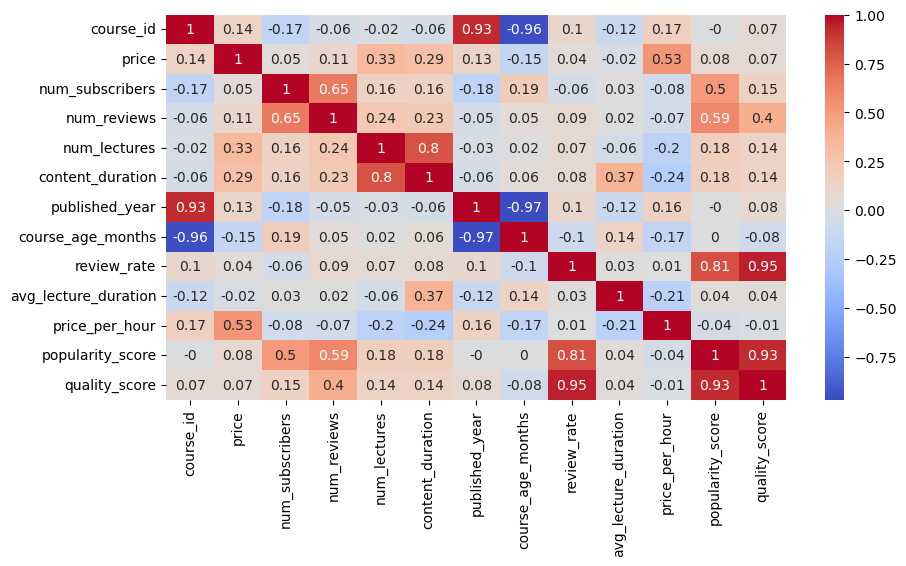

In [159]:
corr_numeric = df.select_dtypes(include=['number']).corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(corr_numeric,annot=True,cmap='coolwarm')
plt.show()

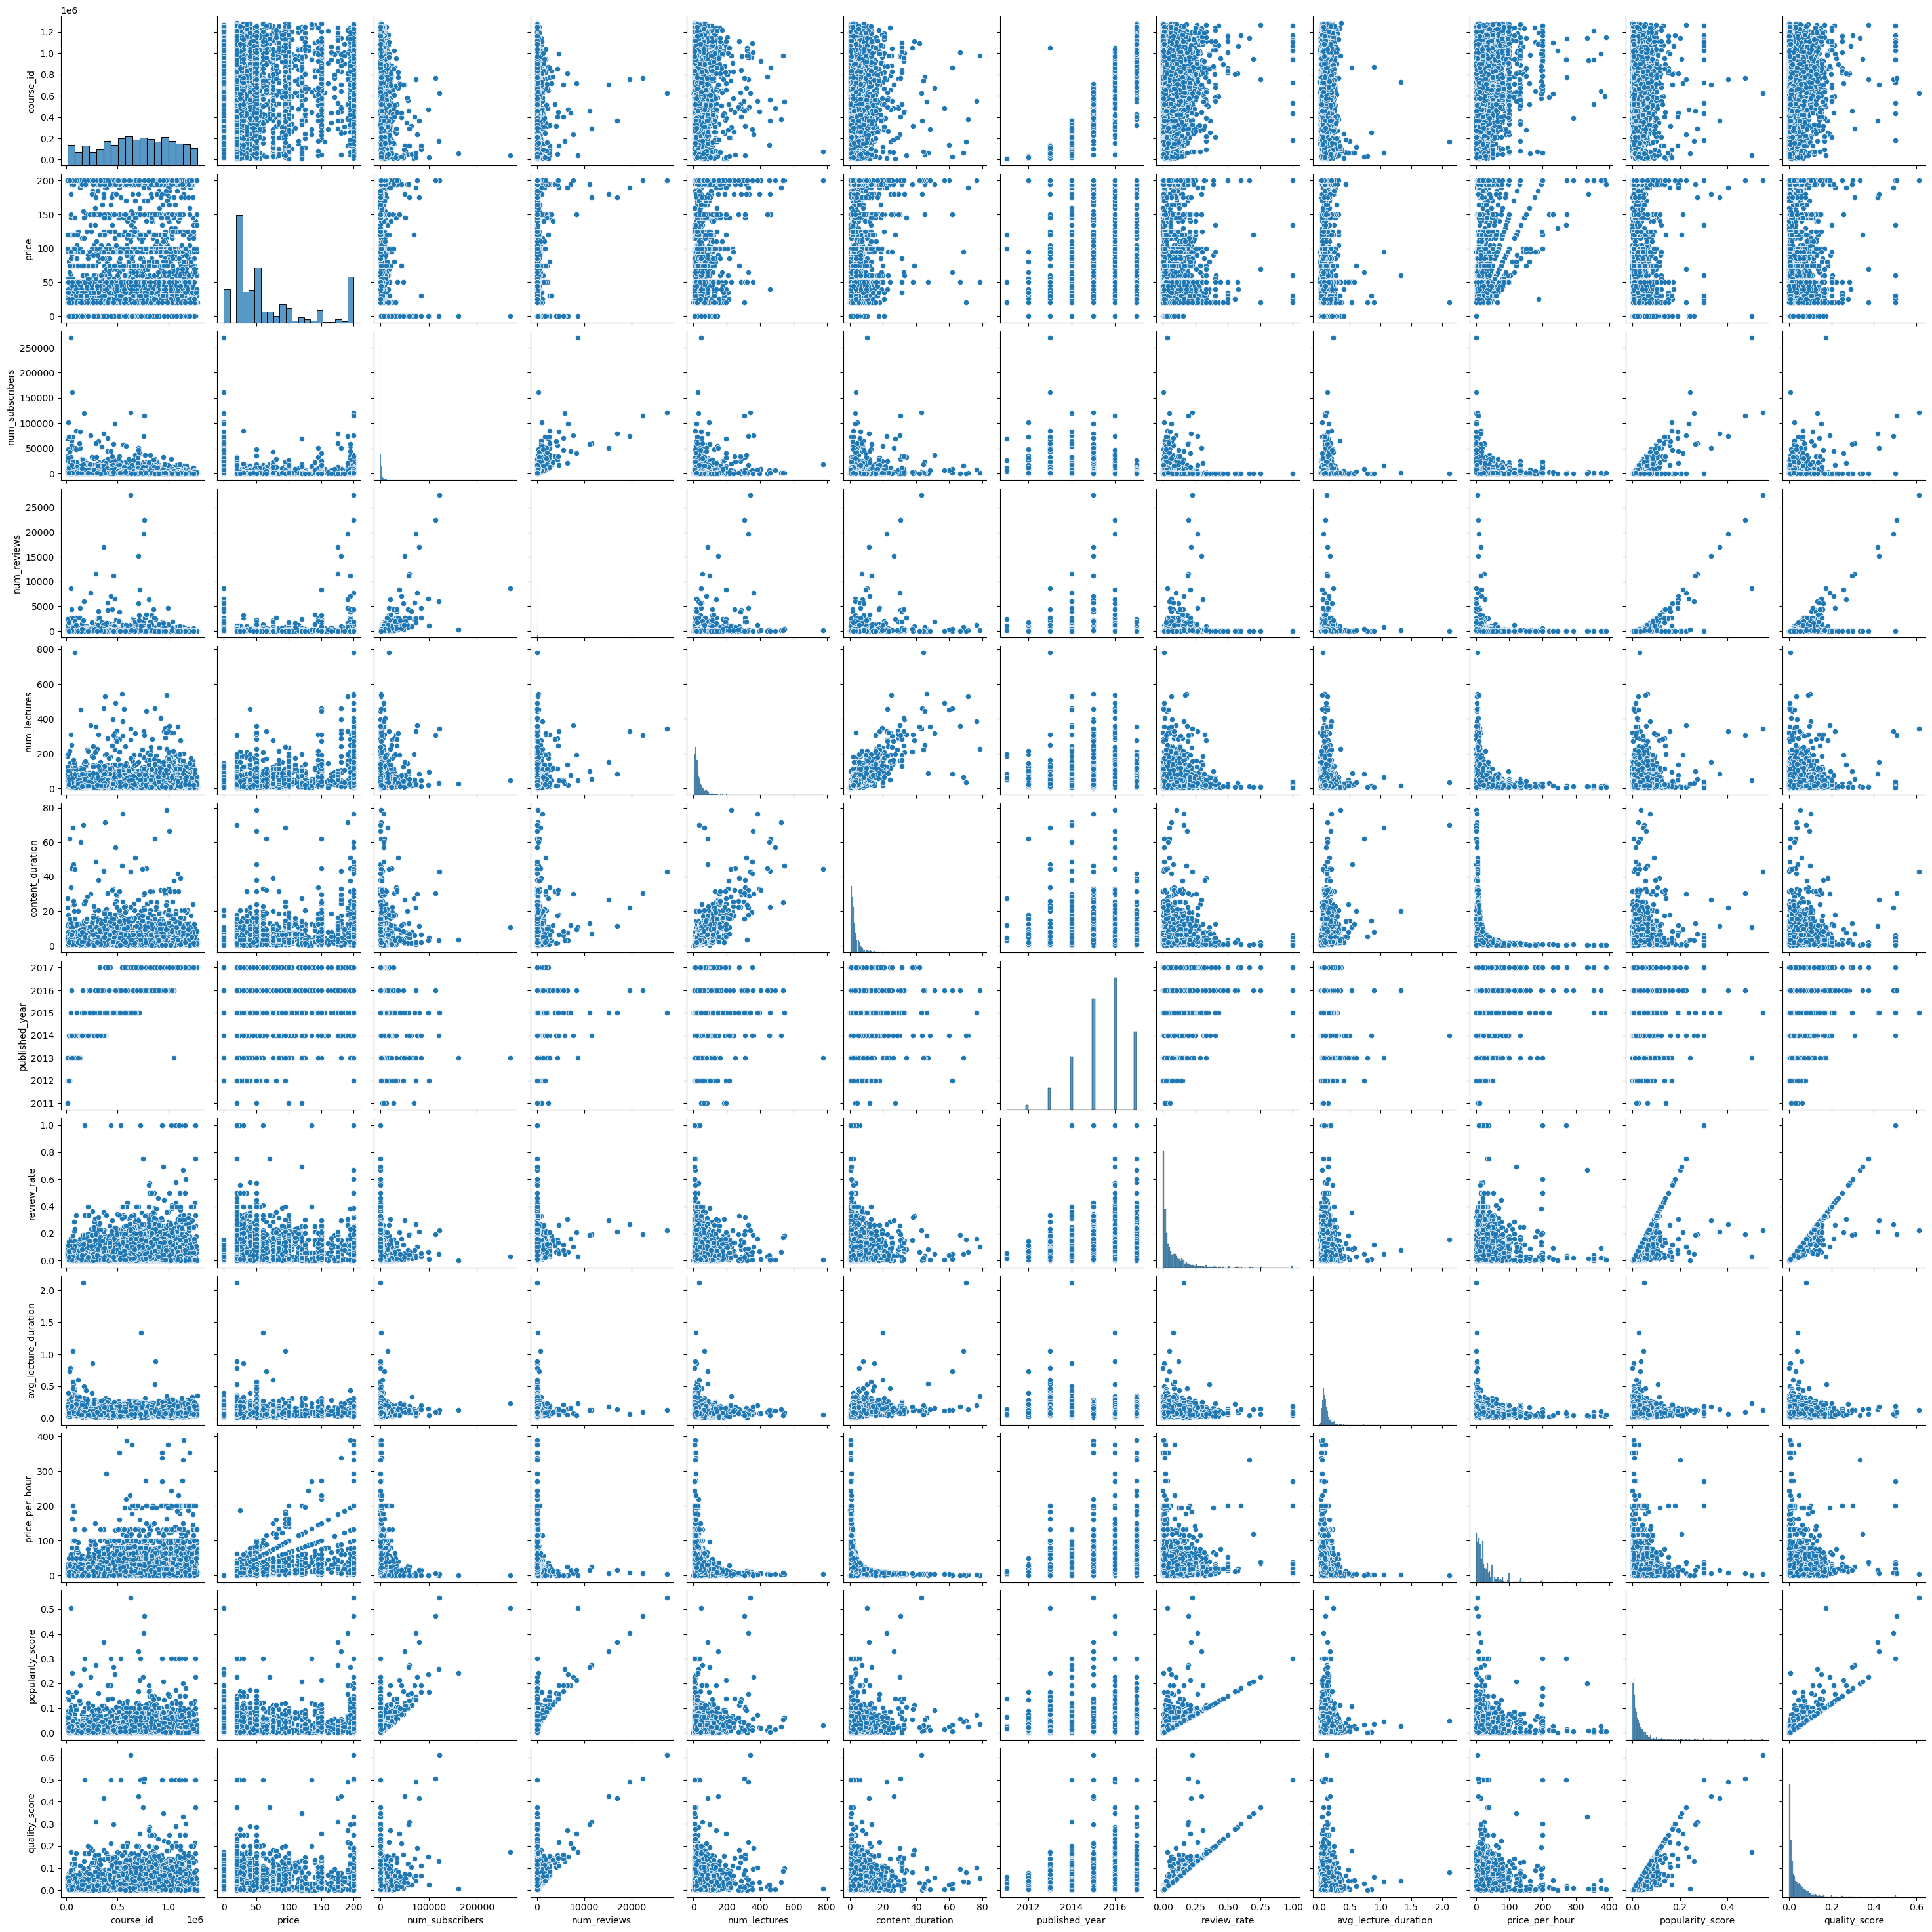

In [123]:
sns.pairplot(df.select_dtypes(include=['number']))

In [160]:
df


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,subject,published_year,course_age_months,review_rate,avg_lecture_duration,price_per_hour,popularity_score,quality_score,length_category,price_category
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,...,Business Finance,2017,106.6,0.010713,0.029412,133.333333,0.006659,0.005775,Short,Premium
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,...,Business Finance,2017,105.0,0.330587,0.142336,1.923077,0.113418,0.182109,Long,Mid-Range
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,...,Business Finance,2016,107.6,0.034039,0.049020,18.000000,0.014254,0.018367,Medium,Budget
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,...,Business Finance,2017,102.2,0.004488,0.083333,31.666667,0.005112,0.002444,Medium,Mid-Range
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,...,Business Finance,2016,107.8,0.035266,0.076923,100.000000,0.012970,0.018453,Medium,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,...,Web Development,2016,113.9,0.013462,0.095238,50.000000,0.005738,0.006986,Medium,Premium
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,...,Web Development,2017,104.9,0.009804,0.083333,7.142857,0.003429,0.004957,Medium,Budget
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,...,Web Development,2015,119.5,0.329435,0.072917,11.428571,0.101441,0.167796,Medium,Budget
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,...,Web Development,2016,112.0,0.103333,0.078947,16.666667,0.031785,0.052231,Medium,Mid-Range


6

In [134]:
df.dtypes


course_id                             int64
course_title                         object
url                                  object
is_paid                                bool
price                                 int64
num_subscribers                       int64
num_reviews                           int64
num_lectures                          int64
level                                object
content_duration                    float64
published_timestamp     datetime64[ns, UTC]
subject                              object
published_year                        int32
review_rate                         float64
avg_lecture_duration                float64
price_per_hour                      float64
popularity_score                    float64
quality_score                       float64
length_category                      object
price_category                       object
dtype: object

2017